# Projeto 3
## André Ejzenmesser
## Vinicius Bonelli

Variáveis escolhidas: Acesso a internet por 100 pessoas e IDH

Variável resposta: Indice de percepção de corrupção (Corruption Perception Index - CPI)

In [1]:
%matplotlib notebook

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np
import scipy

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/AndreEjz/Desktop/CDP3


In [2]:
d0 = pd.read_excel('Dados.xlsx', index_col=0)
d1 = pd.read_excel('CDados.xlsx', index_col=0)
d2 = pd.read_excel('Corrupcao.xlsx', index_col=0)
grupos = pd.read_excel('grupos.xlsx', index_col=0)

In [3]:
d2.head()

,CPI
Paises,
Afghanistan,1.4
Albania,3.3
Algeria,2.9
Angola,1.9
Argentina,2.9


In [4]:
d0.head()

,Internet,Celular,Renda,IDH,Saneamento,Servicos
Países,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,47.607657
Afghanistan,3.246306,34.338687,NaN,0.387,37.0,60.239255
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,30.960967
Albania,41.200000,77.167390,1857.352947,0.734,94.0,NaN
Algeria,11.230000,93.647115,2192.703976,0.691,95.0,NaN


In [5]:
dados0 = d2.join(d0, how='outer')
dados0.head()

,CPI,Internet,Celular,Renda,IDH,Saneamento,Servicos
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,47.607657
Afghanistan,1.4,3.246306,34.338687,NaN,0.387,37.0,60.239255
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,30.960967
Albania,3.3,41.200000,77.167390,1857.352947,0.734,94.0,NaN
Algeria,2.9,11.230000,93.647115,2192.703976,0.691,95.0,NaN


In [6]:
dados0=dados0[~np.isnan(dados0.CPI)]
dados0=dados0[~np.isnan(dados0.Internet)]
dados0=dados0[~np.isnan(dados0.IDH)]
dados0=dados0[~np.isnan(dados0.Celular)]
dados0=dados0[~np.isnan(dados0.Renda)]
dados0=dados0[~np.isnan(dados0.Saneamento)]
dados0=dados0[~np.isnan(dados0.Servicos)]

dados0.shape

(83, 7)

____
## Análise Descritiva

<IPython.core.display.Javascript object>


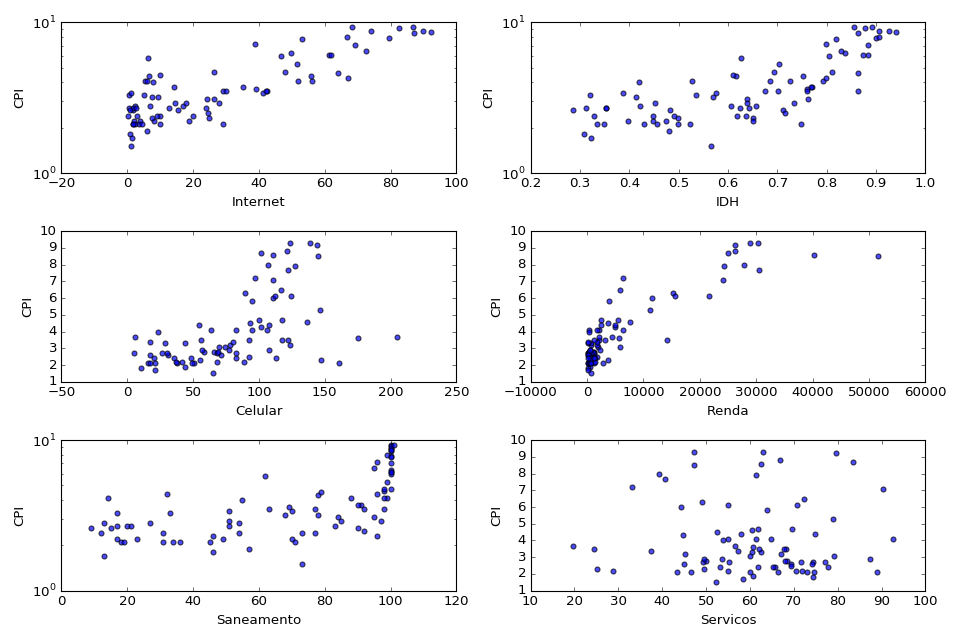

In [7]:
f, ax = plt.subplots(3,2,figsize=(12,8))
ax[0,0].scatter(dados0.Internet, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[0,0].set_xlabel("Internet")
ax[0,0].set_ylabel("CPI")
ax[0,0].set_yscale('log')

ax[0,1].scatter(dados0.IDH, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[0,1].set_xlabel("IDH")
ax[0,1].set_ylabel("CPI")
ax[0,1].set_yscale('log')


ax[1,0].scatter(dados0.Celular, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[1,0].set_xlabel("Celular")
ax[1,0].set_ylabel("CPI")


ax[1,1].scatter(dados0.Renda, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[1,1].set_xlabel("Renda")
ax[1,1].set_ylabel("CPI")


ax[2,0].scatter(dados0.Saneamento, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[2,0].set_xlabel("Saneamento")
ax[2,0].set_ylabel("CPI")
ax[2,0].set_yscale('log')


ax[2,1].scatter(dados0.Servicos, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[2,1].set_xlabel("Servicos")
ax[2,1].set_ylabel("CPI")


plt.tight_layout(1)

In [8]:
dados = d2.join(d1, how='outer')
dados.head()

,CPI,Internet,IDH
Abkhazia,NaN,NaN,NaN
Afghanistan,1.4,3.246306,0.387
Akrotiri and Dhekelia,NaN,NaN,NaN
Albania,3.3,41.200000,0.734
Algeria,2.9,11.230000,0.691


In [9]:
dados=dados[~np.isnan(dados.CPI)]
dados=dados[~np.isnan(dados.Internet)]
dados=dados[~np.isnan(dados.IDH)]

dados.shape

(162, 3)

<IPython.core.display.Javascript object>


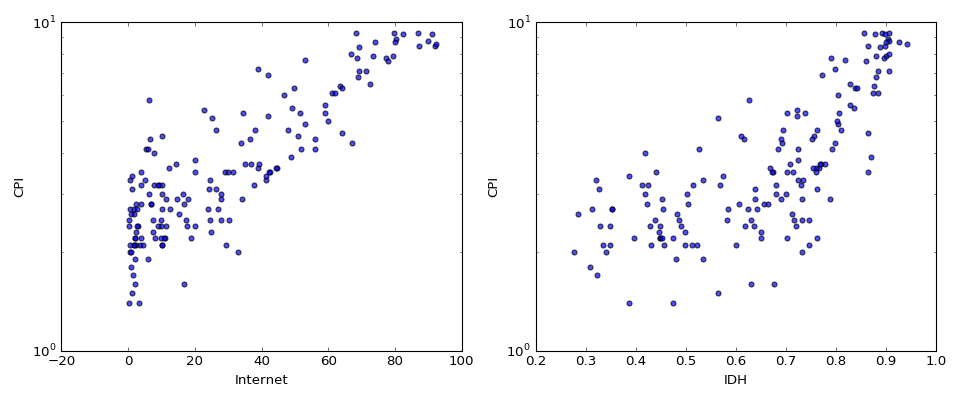

In [10]:
f, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].scatter(dados.Internet, dados.CPI, alpha=0.7)  # Plot the raw data
ax[0].set_xlabel("Internet")
ax[0].set_ylabel("CPI")
ax[0].set_yscale('log')

ax[1].scatter(dados.IDH, dados.CPI, alpha=0.7)  # Plot the raw data
ax[1].set_xlabel("IDH")
ax[1].set_ylabel("CPI")
ax[1].set_yscale('log')

plt.tight_layout(1)


In [11]:
dados.corr(method='pearson')

,CPI,Internet,IDH
CPI,1.000000,0.877293,0.728073
Internet,0.877293,1.000000,0.856976
IDH,0.728073,0.856976,1.000000


<IPython.core.display.Javascript object>


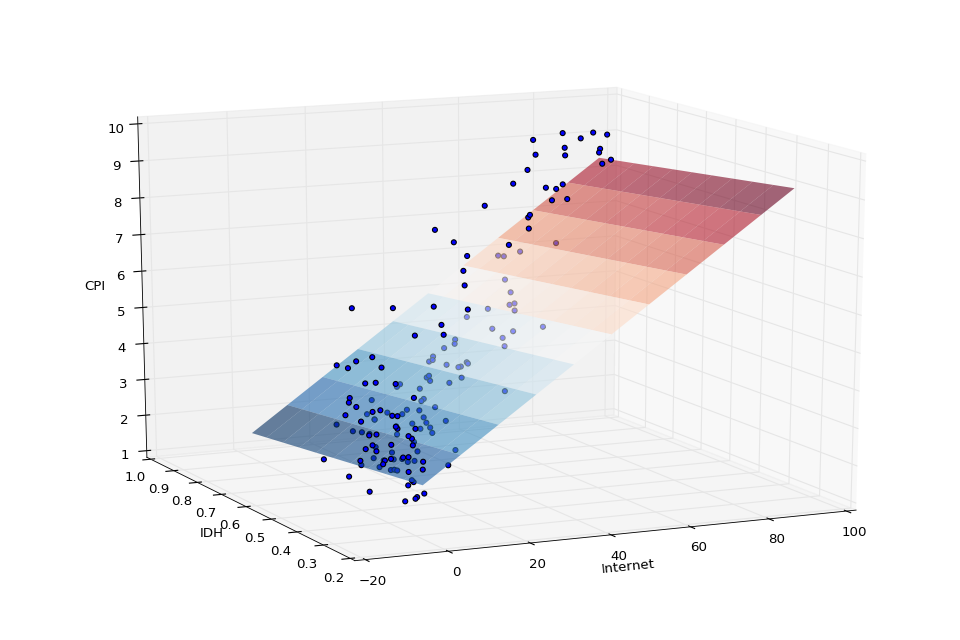

In [12]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Internet', 'IDH']]
y = dados['CPI']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Internet.min(), X.Internet.max(), 100), 
                       np.linspace(X.IDH.min(), X.IDH.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].Internet, X[resid >= 0].IDH, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Internet, X[resid < 0].IDH, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('Internet')
ax.set_ylabel('IDH')
ax.set_zlabel('CPI')

In [13]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=dados.CPI
X=dados.iloc[:,(1,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     268.8
Date:                Tue, 29 Nov 2016   Prob (F-statistic):           9.80e-52
Time:                        19:05:34   Log-Likelihood:                -231.94
No. Observations:                 162   AIC:                             469.9
Df Residuals:                     159   BIC:                             479.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.5024      0.441      5.676      0.000         1.632     3.373
Internet       0.0755      0.006     12.976      0.000         0.064     0.087
IDH           -1.0665      0.877     -1.216      0.226        -2.798     0.665
==============================================================================
Omnibus:                        5.939   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.508
Skew:                           0.414   Prob(JB):                       0.0637
Kurtosis:                       3.362   Cond. No.                         486.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Teste de White
#ver link https://pt.wikipedia.org/wiki/Teste_de_White
#y estimados
y_hat = fit.predict(X)

#Resíduos quadráticos
res2=(y-y_hat)**2

sm1.stats.diagnostic.het_white(res2,X)

(3.5810675680208668,
 0.61115813654311135,
 0.70527749686878338,
 0.62029338937127543)

____
## Separando em Grupos

Para separar os grupos usamos o PIB per capta de cada país.

In [15]:
subgrupos = d2.join(grupos, how='outer')

In [16]:
subgrupos=subgrupos[~np.isnan(subgrupos.CPI)]
subgrupos=subgrupos[~np.isnan(subgrupos.Internet)]
subgrupos=subgrupos[~np.isnan(subgrupos.IDH)]
subgrupos=subgrupos[~np.isnan(subgrupos.Renda)]

subgrupos.shape
subgrupos.head()

,CPI,Internet,Renda,IDH
Albania,3.3,41.20,1857.352947,0.734
Algeria,2.9,11.23,2192.703976,0.691
Angola,1.9,6.00,619.818580,0.481
Argentina,2.9,34.00,9933.229024,0.788
Armenia,2.6,15.30,1302.456980,0.712


In [17]:
corte = 2200.553962

### Até 15000 dólares

In [18]:
#Até 1500 dólares
grupo1 = pd.DataFrame()
grupo1['CPI']=subgrupos[subgrupos.Renda <= corte].CPI
grupo1['Internet']=subgrupos[subgrupos.Renda <= corte].Internet
grupo1['IDH']=subgrupos[subgrupos.Renda <= corte].IDH
grupo1['PIB']=subgrupos[subgrupos.Renda <= corte].Renda
grupo1.head()

,CPI,Internet,IDH,PIB
Albania,3.3,41.20,0.734,1857.352947
Algeria,2.9,11.23,0.691,2192.703976
Angola,1.9,6.00,0.481,619.818580
Armenia,2.6,15.30,0.712,1302.456980
Bangladesh,2.4,3.10,0.491,532.076998


### Maiores que 15000 dólares

In [19]:
#Entre 1000 e 4000 dólares
grupo2 = pd.DataFrame()
grupo2['CPI']=subgrupos[subgrupos.Renda > corte].CPI
grupo2['Internet']=subgrupos[subgrupos.Renda > corte].Internet
grupo2['IDH']=subgrupos[subgrupos.Renda > corte].IDH
grupo2['PIB']=subgrupos[subgrupos.Renda > corte].Renda
grupo2.head()

,CPI,Internet,IDH,PIB
Argentina,2.9,34.000000,0.788,9933.229024
Australia,8.7,74.082908,0.926,25007.697756
Austria,7.9,73.488317,0.879,26183.997598
Bahrain,4.9,53.000000,0.805,11600.707375
Barbados,7.8,68.700000,0.790,9243.587053


<IPython.core.display.Javascript object>


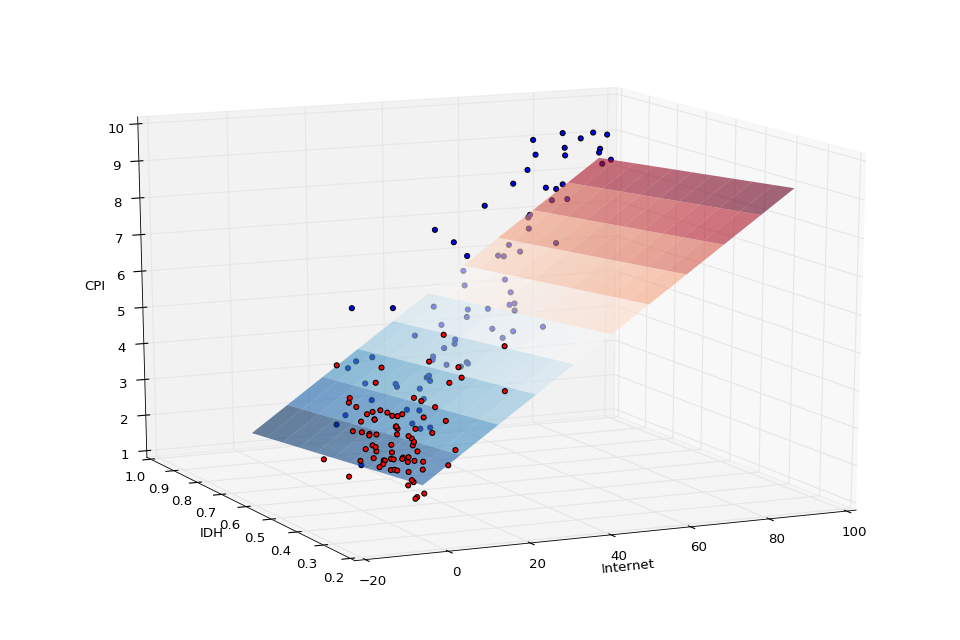

In [20]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Internet', 'IDH']]
y = dados['CPI']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Internet.min(), X.Internet.max(), 100), 
                       np.linspace(X.IDH.min(), X.IDH.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

ax.scatter(grupo1.Internet, grupo1.IDH, grupo1.CPI, color='black', alpha=1.0, facecolor='white',c='red')
ax.scatter(grupo2.Internet, grupo2.IDH, grupo2.CPI, color='black', alpha=1.0)
#ax.mouse_init()

ax.set_xlabel('Internet')
ax.set_ylabel('IDH')
ax.set_zlabel('CPI')